In [1]:
# Cargar las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Lectura y cargue de los datos de dataset
Datos = pd.read_csv(r'C:\Users\user\Documents\8SEMESTRE\ANALISIS DE DATOS\Tarea 3\car details v4.csv')

In [3]:
#  Punto 1 - Análisis exploratorio de los datos

In [4]:
Datos.head(100)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Porsche,Cayenne Coupe Platinum Edition,16200000,2022,2766,Petrol,Automatic,Mumbai,Blue,First,Individual,2995 cc,335 bhp @ 5300 rpm,450 Nm @ 1340 rpm,AWD,4931.0,1983.0,1676.0,4.0,75.0
96,Mercedes-Benz,C-Class Cabriolet C 300,5100000,2017,56000,Petrol,Automatic,Ghaziabad,White,Second,Individual,1991 cc,241 bhp @ 5500 rpm,370 Nm @ 1300 rpm,RWD,4686.0,1810.0,1409.0,4.0,59.0
97,Hyundai,Elite i20 Magna 1.2,525000,2015,68766,Petrol,Manual,Mumbai,Silver,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0
98,Hyundai,Verna 1.6 VTVT SX,750000,2018,16339,Petrol,Manual,Kolkata,Black,First,Individual,1591 cc,121 bhp @ 6300 rpm,158 Nm @ 4200 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0


In [5]:
Datos.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Text(0.5, 1.0, 'IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS')

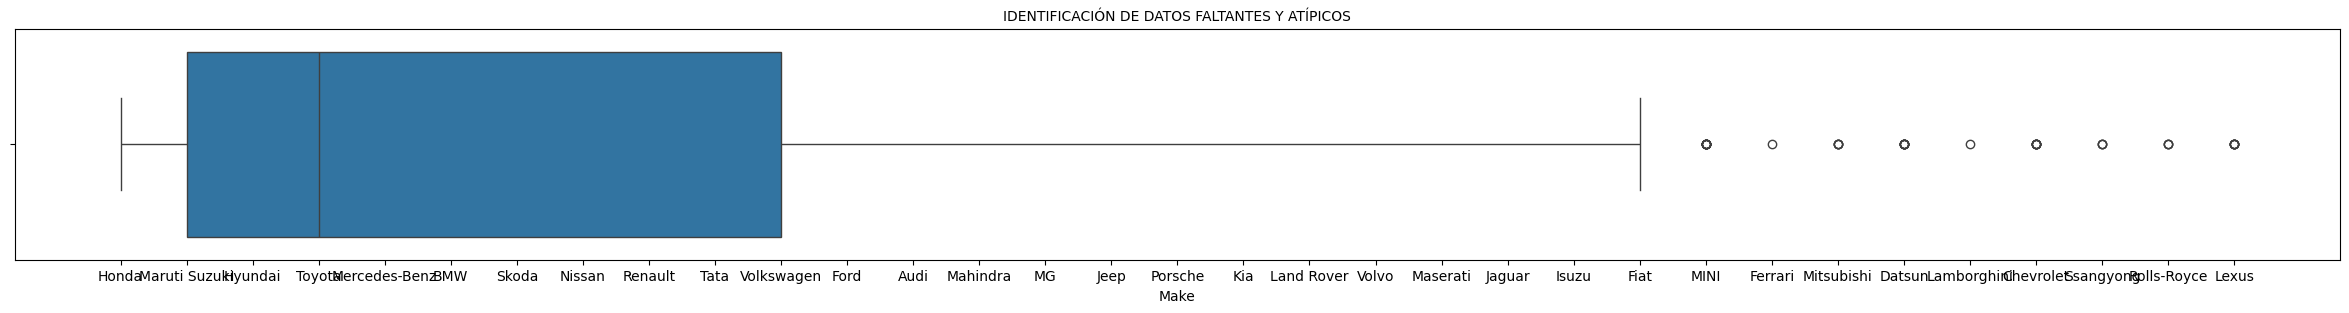

In [6]:
plt.figure(figsize=(30, 3))
sns.boxplot(x=Datos['Make'])
plt.title('IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS', fontsize=10)

Text(0.5, 1.0, 'IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS')

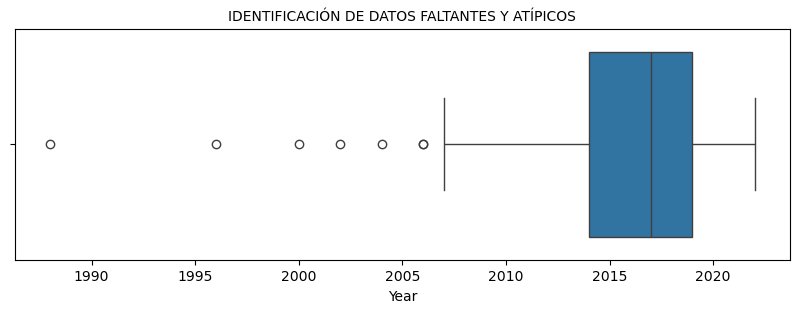

In [7]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=Datos['Year'])
plt.title('IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS', fontsize=10)

Text(0.5, 1.0, 'IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS')

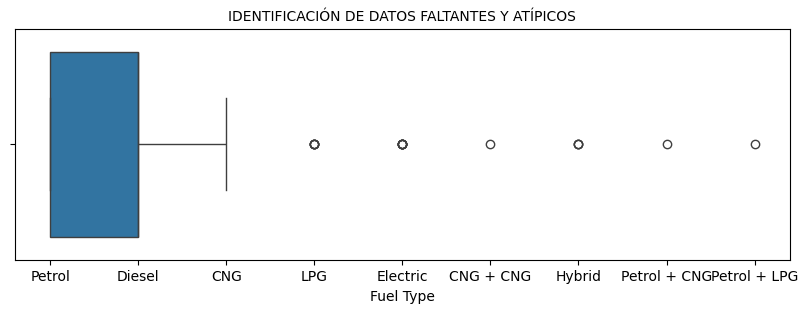

In [8]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=Datos['Fuel Type'])
plt.title('IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS', fontsize=10)

Text(0.5, 1.0, 'IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS')

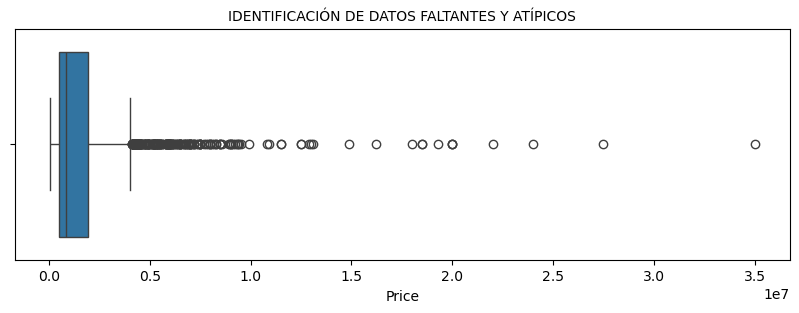

In [9]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=Datos['Price'])
plt.title('IDENTIFICACIÓN DE DATOS FALTANTES Y ATÍPICOS', fontsize=10)

In [10]:
# Verificar tipos de datos
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [11]:
# Mostrar cantidad de valores faltantes por columna
print("Valores faltantes por columna:\n", Datos.isnull().sum())

Valores faltantes por columna:
 Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [12]:
# Punto 2 - Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [13]:
# Filtrar solo las columnas relevantes
columnas_utiles = ['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']
Datos_filtrado = Datos[columnas_utiles].copy()

In [14]:
Datos_filtrado.head(100)

,Make,Price,Year,Kilometer,Fuel Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,1198 cc,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,1248 cc,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,1197 cc,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,1197 cc,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,2393 cc,7.0,55.0
...,...,...,...,...,...,...,...,...
95,Porsche,16200000,2022,2766,Petrol,2995 cc,4.0,75.0
96,Mercedes-Benz,5100000,2017,56000,Petrol,1991 cc,4.0,59.0
97,Hyundai,525000,2015,68766,Petrol,1197 cc,5.0,45.0
98,Hyundai,750000,2018,16339,Petrol,1591 cc,5.0,43.0


In [15]:
# Eliminar filas con más de 2 valores faltantes
Datos_filtrado = Datos_filtrado[Datos_filtrado.isnull().sum(axis=1) <= 2]

In [16]:
# Identificar columnas numéricas y categóricas
columnas_numericas = Datos_filtrado.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = Datos_filtrado.select_dtypes(include=['object']).columns

In [17]:
# Rellenar valores numéricos con la media
for columna in columnas_numericas:
    Datos_filtrado[columna] = Datos_filtrado[columna].fillna(Datos_filtrado[columna].mean())

In [18]:
# Rellenar valores categóricos con la moda 
for columna in columnas_categoricas:
    Datos_filtrado[columna] = Datos_filtrado[columna].fillna(Datos_filtrado[columna].mode()[0])

In [19]:
# Confirmamos que ya no hay valores faltantes
print("\nValores faltantes después de limpiar:\n", Datos_filtrado.isnull().sum().sum())


Valores faltantes después de limpiar:
 0


In [20]:
# Crear nueva columna con logaritmo natural del precio
Datos_filtrado['Precio_log'] = np.log(Datos_filtrado['Price'])

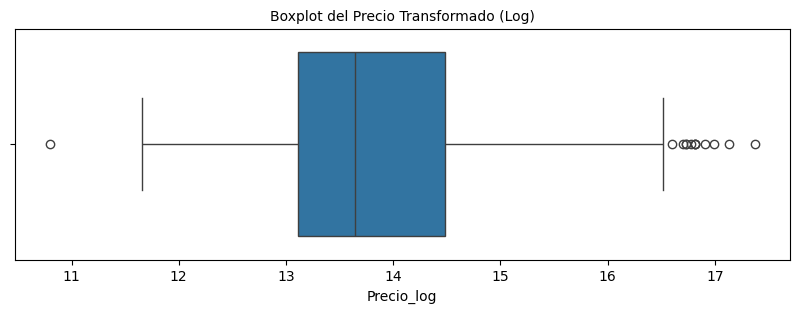

In [21]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=Datos_filtrado['Precio_log'])
plt.title('Boxplot del Precio Transformado (Log)', fontsize=10)
plt.show()

In [22]:
# Punto 3 - Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [23]:
# Separar características (X) y variable objetivo (y)
X = Datos_filtrado[['Year', 'Kilometer', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']] 
y = Datos_filtrado['Precio_log']

In [24]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [25]:
# Punto 4 - Dividir el dataset en Train y Test para evaluar correctamente el modelo.



In [26]:
# --- Dividir en train y test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Punto 5 - Entrenar el modelo configurando los diferentes hiperparámetros.


In [28]:
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

In [29]:
# Punto 6 - Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [30]:
# Evaluar el modelo
print("\nCoeficientes del modelo:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef:.2f}")
print(f"\nIntercepto: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.2f}")


Coeficientes del modelo:
Year: 0.13
Kilometer: -0.00
Seating Capacity: -0.03
Fuel Tank Capacity: 0.02
Engine_1061 cc: 0.34
Engine_1086 cc: 0.06
Engine_1120 cc: -0.13
Engine_1186 cc: 0.00
Engine_1196 cc: -0.10
Engine_1197 cc: 0.31
Engine_1198 cc: 0.31
Engine_1199 cc: 0.28
Engine_1248 cc: 0.47
Engine_1298 cc: 0.45
Engine_1332 cc: 1.72
Engine_1336 cc: 0.36
Engine_1353 cc: 0.81
Engine_1364 cc: 0.39
Engine_1368 cc: 0.44
Engine_1373 cc: 0.51
Engine_1395 cc: 1.56
Engine_1396 cc: 0.43
Engine_1399 cc: 0.04
Engine_1451 cc: 0.72
Engine_1461 cc: 0.37
Engine_1462 cc: 0.48
Engine_1493 cc: 0.56
Engine_1495 cc: -0.00
Engine_1496 cc: 1.36
Engine_1497 cc: 0.62
Engine_1498 cc: 0.45
Engine_1499 cc: 0.23
Engine_1582 cc: 0.65
Engine_1586 cc: 0.28
Engine_1591 cc: 0.60
Engine_1595 cc: 1.35
Engine_1598 cc: 0.32
Engine_1794 cc: 0.59
Engine_1796 cc: 1.61
Engine_1797 cc: 0.64
Engine_1798 cc: 1.03
Engine_1799 cc: 0.44
Engine_1948 cc: 0.38
Engine_1950 cc: 1.69
Engine_1956 cc: 0.89
Engine_1968 cc: 1.36
Engine_1969 

In [31]:
# Punto 7 - Gráfica resultado del modelo

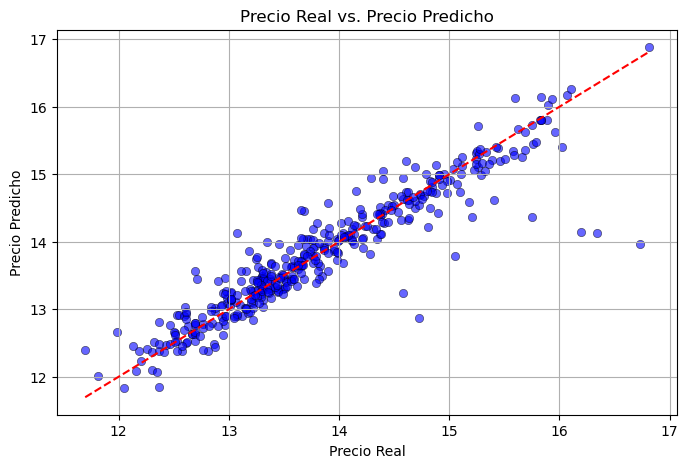

In [32]:
# Comparación entre valores reales y predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Precio Real vs. Precio Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid(True)
plt.show()

In [66]:
# Volver a la escala de precios real
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

In [68]:
comparacion = pd.DataFrame({
    'Precio Real': y_test_real,
    'Precio Predicho': y_pred_real
})

print(comparacion.head(10))

      Precio Real  Precio Predicho
923      315000.0     3.049200e+05
1729     425000.0     3.982028e+05
427     2500000.0     2.400529e+06
1654     595000.0     7.240730e+05
880     1240000.0     1.377244e+06
1715     775000.0     6.884556e+05
961      495000.0     6.696727e+05
1727    6975000.0     5.078015e+06
1498    1025000.0     7.230183e+05
1262    1015000.0     8.334067e+05
